In [ ]:
'''
    Ho ten: Le Hoang Duc
    MSSV: 18110075
'''
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# Read data
path = '/content/Fish.csv'
data = pd.read_csv(path)
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
def pre_proc(data, features, label, bias_trick=True):
    '''
        Select features and convert data into numpy array before modeling
        Params: 
            @data: DataFrame,
                Input data
            @features: array-like
                Features selected for model
            @label: array-like
                Label of each samples/ observations/ data point.
            @bias_trick: bool
                True: Add a bias term (column one) to original dataset.
        Return:
            @X: numpy-array
                Dataset as numpy array
            @y: numpy-array
                Label as numpy array
    '''
    pass
    # Get data from dataframe
    X = data[features]
    y = data[label]

    # Convert data into numpy arrays
    X = X.to_numpy()
    y = y.to_numpy().reshape(-1,1)
    # Bias trick
    if bias_trick==True:
        one = np.ones((X.shape[0],1))
        Xbar = np.concatenate((one, X), axis=1)
    return Xbar, y


In [ ]:
def cost_J(X, y, w):
    '''
        Measure how the difference between model's prediction and target (labels) values 
        Params:
            @X: array-like,
                Input samples
            @y: array-like,
                Labels
            @w: array-like,
                Current weight
        Return: float,
            Value of cost function subject to weight.
    '''
    pred = X.dot(w) # prediction
    error = (1/2) * np.mean((pred - y)**2)
    return error
def gradient_J(X, y, w):
    '''
        Evaluate gradient of cost function subject to a weight.
        Params:
            @X: array-like,
                Input samples
            @y: array-like,
                Labels
            @w: array-like,
                Weight
        Return: array-like,
            Gradient of cost function
    '''
    return (1/X.shape[0]) * X.T.dot((X.dot(w) - y))

class LinearRegressionModel:
    '''
       An inheritance of Linear Regression model
    '''
    def __init__(self, X, Y, w_init, learning_rate = 0.001, max_iters = 10, batch_size=64, epochs=100):
        '''
            @X: array-like,
                Input data.
            @Y: array-like,
                Input label.
            @w_init: array-like,
                An initial weight
            @learning_rate: float, default=0.001
                Hyperparameter for the solvers (optimization algorithms) to converge, chosen by range 0 to 1.
            @max_iters: int, default=10
                Maximum number of iterations taken for the solvers to converge.
            @batch_size: int, default=64
                Size of the mini batches. Regulary, used for mini-batch gradient descent.
            @epochs: int, default=100
                The number of an ENTIRE dataset is passed.
                
        '''
        self.X = X
        self.Y = Y
        self.w = w_init
        self.lr = learning_rate
        self.max_iters = max_iters
        self.batch_size = batch_size
        self.epochs = epochs
        self.hist = []
        self.weights = {}

    def BatchGD(self):
        '''
            Perform Linear Regression by Batch Gradient Descent
        '''
        pass
        N, p = self.X.shape
        w_old = self.w
        ep = 1e-3
        for epoch in range(self.epochs):
            grad = gradient_J(self.X, self.Y, self.w)
            self.w = self.w - self.lr * grad
            loss = cost_J(self.X, self.Y, self.w)
            self.hist.append(loss)
            print(f'>> Epoch: {epoch}/{self.epochs}, Loss: {loss} =================== w: ({self.w[0][-1]}, {self.w[1][-1]})')
            if np.linalg.norm(self.w - w_old)/p < ep:
                print('######## Early stop training!!! #######')
                break
            w_old = self.w
            self.weights[loss] = self.w
        return self.w
    
    def SGD(self):
        '''
            Perform Linear Regression by Stochastic Gradient Descent
        '''
        N, p = self.X.shape
        rnd_inds = list(range(N))
        epsilon = 1e-2
        for epoch in range(self.epochs):
            # w_old = self.w
            np.random.shuffle(rnd_inds)
            for i in rnd_inds:
                x = self.X[i,:].reshape(-1,1)
                y = self.Y[i]
                grad = gradient_J(x.T, y, self.w)
                self.w = self.w - self.lr * grad
                loss = cost_J(x.T, y, self.w)
                print(f'w at iter {i}: ', (self.w[0][-1], self.w[1][-1]), f', Loss: {loss}')
            self.hist.append(loss)
            # if np.linalg.norm(self.w - w_old)/p < epsilon:
            #     break
            if loss < epsilon:
                print('######## Early stop training!!! #######')
                break
            self.weights[loss] = self.w
            print(f'>> Epoch: {epoch}/{self.epochs} ======================= Loss: {loss}')
        return self.w
    def MiniBatchGD(self):
        '''
            Perform Linear Regression by Mini-Batch Gradient Descent
        '''
        pass
        N, p = self.X.shape
        rnd_inds = list(range(N))
        for epoch in range(self.epochs):
            j = 0
            for iter in range(self.max_iters):
                if j > N:
                    break
                batch_inds = rnd_inds[j:j+self.batch_size]
                # print(f'j: {j} - {len(batch_inds)}')
                X = self.X[batch_inds,:]
                y = self.Y[batch_inds]
                grad = gradient_J(X,y,self.w)
                self.w = self.w - self.lr * grad             
                print(f'w at iter {iter}: [{self.w[0][-1]}, {self.w[1][-1]}')
                j += self.batch_size
            loss = cost_J(X, y, self.w)
            self.hist.append(loss)
            self.weights[loss] = self.w
            print(f'>> Epoch: {epoch}/{self.epochs} =========================== Loss: {loss}')
            np.random.shuffle(rnd_inds)
        return self.w
    def best_weights(self):
        '''
            Save the best weight of model
        '''
        return min(self.weights.items(), key=lambda x: x[0])
    def history(self, ax):
        '''
            Plot a visualization for the loss function
        '''
        pass
        ax.plot(self.hist)

# **Bài 1**

In [ ]:
# Select features for modeling
features = ['Height']
label = ['Weight']
X, y = pre_proc(data,features,label)

In [ ]:
print(X.shape)
print(y.shape)

(159, 2)
(159, 1)


In [ ]:
# Model
w_init = np.random.randn(2, 1) # initialize w
model1 =  LinearRegressionModel(X=X, Y=y, w_init=w_init, learning_rate=0.01,epochs=20000)
w_opt1 = model1.BatchGD()

>> Epoch: 0/20000, Loss: 32276.05163087143 =================== w: (3.0233883264488597, 46.86917025952545)
>> Epoch: 1/20000, Loss: 32266.538029404626 =================== w: (2.7717882778922966, 47.09985022096445)
>> Epoch: 2/20000, Loss: 32259.20179785897 =================== w: (2.5020099449887803, 47.125339901985285)
>> Epoch: 3/20000, Loss: 32251.89249156763 =================== w: (2.232642717733044, 47.14986420505159)
>> Epoch: 4/20000, Loss: 32244.609968748537 =================== w: (1.963769089064196, 47.17433941350244)
>> Epoch: 5/20000, Loss: 32237.3541312582 =================== w: (1.6953885272712323, 47.19876972009009)
>> Epoch: 6/20000, Loss: 32230.124881313655 =================== w: (1.4275001298287169, 47.223155225562735)
>> Epoch: 7/20000, Loss: 32222.922121490217 =================== w: (1.1601029941983554, 47.24749601216056)
>> Epoch: 8/20000, Loss: 32215.74575472021 =================== w: (0.8931962194894736, 47.27179216189076)
>> Epoch: 9/20000, Loss: 32208.595684291642

In [ ]:
model2 =  LinearRegressionModel(X=X, Y=y, w_init=w_init, learning_rate=0.01,epochs=5000)
w_opt2 = model2.SGD()

Streaming output truncated to the last 5000 lines.
w at iter 69:  (-146.7830305230761, 33.44950156792997) , Loss: 0.2600482780438418
w at iter 32:  (-142.33838664089805, 116.80524186307335) , Loss: 630845.8207555733
w at iter 88:  (-146.75180305232286, 89.8392675892678) , Loss: 37037.198959969974
w at iter 4:  (-152.16388348060812, 22.491338739686057) , Loss: 45687.10225695624
w at iter 77:  (-150.8168323201434, 29.526178720096993) , Loss: 4667.646167450018
w at iter 83:  (-149.9058756227037, 34.91676497719639) , Loss: 1698.6241692685076
w at iter 22:  (-147.62684154359192, 70.29352727702471) , Loss: 52332.10808337154
w at iter 103:  (-148.58865081515492, 63.400047865878406) , Loss: 1049.377563093755
w at iter 141:  (-141.37788362209474, 140.45646932107746) , Loss: 6004.1166199002555
w at iter 33:  (-156.38872966973386, -139.27665111509668) , Loss: 6944760.744931188
w at iter 0:  (-136.3601721645774, 91.45233134430589) , Loss: 227927.72688890406
w at iter 107:  (-138.93341268005992, 71

In [ ]:
model3 =  LinearRegressionModel(X=X, Y=y, w_init=w_init, learning_rate=0.01,batch_size=64, max_iters=3, epochs=5000)
w_opt3 = model3.MiniBatchGD()

Streaming output truncated to the last 5000 lines.
w at iter 0: [-144.1208664603073, 60.57461372717298
w at iter 1: [-144.09347412983507, 60.459502618846926
w at iter 2: [-144.1439547219505, 60.25902804666573
>> Epoch: 3750/5000 =========================== Loss: 32845.62166453652
w at iter 0: [-144.42200048330247, 57.687493644258616
w at iter 1: [-143.67943260568202, 65.46014051198773
w at iter 2: [-144.64555710899967, 53.506713255356125
>> Epoch: 3751/5000 =========================== Loss: 16848.570218547986
w at iter 0: [-143.8516687585483, 62.91913381712118
w at iter 1: [-144.04322701391183, 60.13038488881292
w at iter 2: [-144.49773322138591, 54.59747645546273
>> Epoch: 3752/5000 =========================== Loss: 10123.744465983747
w at iter 0: [-143.9715911971334, 60.92774572020378
w at iter 1: [-144.03290429594023, 59.72655452289533
w at iter 2: [-143.93359216874848, 61.081913385647255
>> Epoch: 3753/5000 =========================== Loss: 22412.50550625369
w at iter 0: [-143.8105

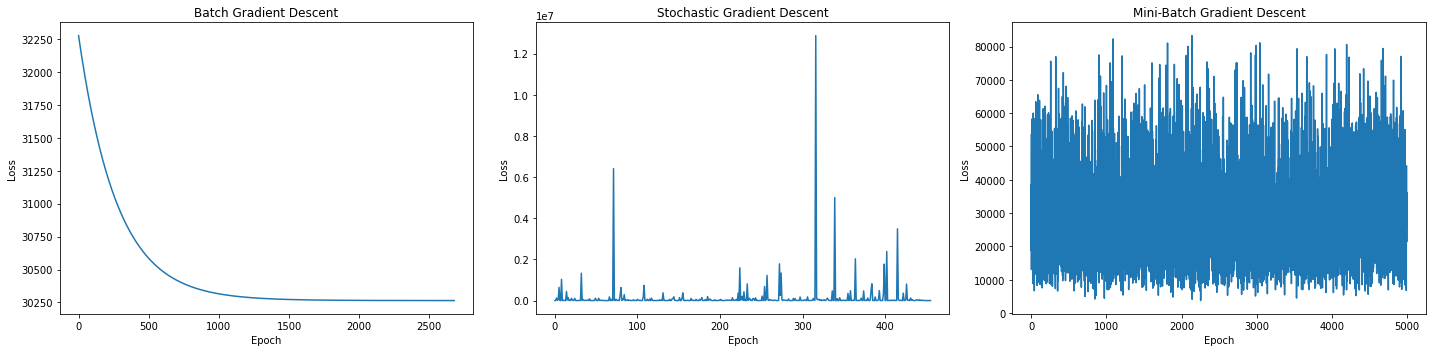

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
model1.history(ax[0])
ax[0].set_title('Batch Gradient Descent')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
model2.history(ax[1])
ax[1].set_title('Stochastic Gradient Descent')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
model3.history(ax[2])
ax[2].set_title('Mini-Batch Gradient Descent')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss')
plt.tight_layout()
plt.show()

# **Bài 2**

In [ ]:
# Select features for modeling
features = ['Height', 'Width']
label = ['Weight']
X, y = pre_proc(data,features,label)
print(X.shape)
print(y.shape)

(159, 3)
(159, 1)


In [ ]:
# Linear Regression model with Batch Gradient Descent
w_init = np.random.randn(3, 1) # initialize w
model4 =  LinearRegressionModel(X=X, Y=y, w_init=w_init, learning_rate=0.01,epochs=20000)
w_opt4 = model4.BatchGD()

>> Epoch: 0/20000, Loss: 34467.84884511804 =================== w: (3.2096383905032226, 46.597272336597456)
>> Epoch: 1/20000, Loss: 29848.77420137211 =================== w: (1.9560281023569606, 36.568173556476346)
>> Epoch: 2/20000, Loss: 29540.31592211957 =================== w: (1.7705725632739817, 38.153329263878675)
>> Epoch: 3/20000, Loss: 29417.768817182066 =================== w: (1.3626092678065422, 37.34710044701462)
>> Epoch: 4/20000, Loss: 29305.288466690283 =================== w: (0.9986215363997479, 37.040765897913225)
>> Epoch: 5/20000, Loss: 29195.3266492103 =================== w: (0.6236309285186037, 36.63736127788092)
>> Epoch: 6/20000, Loss: 29087.50908329941 =================== w: (0.24902194598230226, 36.26004540617452)
>> Epoch: 7/20000, Loss: 28981.768592423585 =================== w: (-0.12752151387527633, 35.88331402778616)
>> Epoch: 8/20000, Loss: 28878.05241496157 =================== w: (-0.5054876226890834, 35.51235431727598)
>> Epoch: 9/20000, Loss: 28776.30969

In [ ]:
# Linear Regression model with Stochastic Gradient Descent
model5 =  LinearRegressionModel(X=X, Y=y, w_init=w_init, learning_rate=0.01,epochs=5000)
w_opt5 = model5.SGD()

Streaming output truncated to the last 5000 lines.
w at iter 88:  (-457.85627984708833, 24.485064294886108) , Loss: 2998.1530697280537
w at iter 123:  (-455.4599504406178, 55.15855996359018) , Loss: 36029.18802610147
w at iter 103:  (-459.314040256111, 27.535527437986968) , Loss: 6176.9578508835375
w at iter 151:  (-457.10544794113395, 32.42512996411466) , Loss: 20845.853778520443
w at iter 30:  (-458.5717913216081, 5.976841044840263) , Loss: 76125.20006977518
w at iter 141:  (-451.87808778663197, 77.50776513065543) , Loss: 91721.3935214101
w at iter 50:  (-458.78505131285135, 26.41833731991583) , Loss: 17717.038377968733
w at iter 16:  (-459.46780141913797, 16.272397640454493) , Loss: 5227.878405193225
w at iter 21:  (-458.9107992213866, 25.18086799041074) , Loss: 5345.770017621134
w at iter 58:  (-461.9468776239693, -7.438758366938295) , Loss: 16312.97819318473
w at iter 117:  (-458.24366210144456, 33.802471621210934) , Loss: 25564.641735036497
w at iter 27:  (-461.4417956719718, -19

In [ ]:
# Linear Regression model with Mini-Batch Gradient Descent
model6 =  LinearRegressionModel(X=X, Y=y, w_init=w_init, learning_rate=0.01,batch_size=64, max_iters=3, epochs=5000)
w_opt6 = model6.MiniBatchGD()

Streaming output truncated to the last 5000 lines.
w at iter 0: [-433.8780123475941, 5.290750173450776
w at iter 1: [-433.7341643244849, 5.3956049479401935
w at iter 2: [-433.87528768713634, 4.190125462429581
>> Epoch: 3750/5000 =========================== Loss: 8416.181076543147
w at iter 0: [-433.59032362403156, 6.5988670262963645
w at iter 1: [-433.79459836701784, 4.578930150137159
w at iter 2: [-433.8522093322696, 4.875408970886202
>> Epoch: 3751/5000 =========================== Loss: 14133.384148098017
w at iter 0: [-433.90989192090495, 3.9285412573380394
w at iter 1: [-433.6511372992303, 7.184302787856954
w at iter 2: [-433.8220802570929, 5.2796795271764205
>> Epoch: 3752/5000 =========================== Loss: 9516.96612346289
w at iter 0: [-433.43632951267, 8.650360475576555
w at iter 1: [-433.9620319547572, 3.4478978222434025
w at iter 2: [-434.334586483544, -0.5315527442546721
>> Epoch: 3753/5000 =========================== Loss: 4229.461424696085
w at iter 0: [-433.8164626017

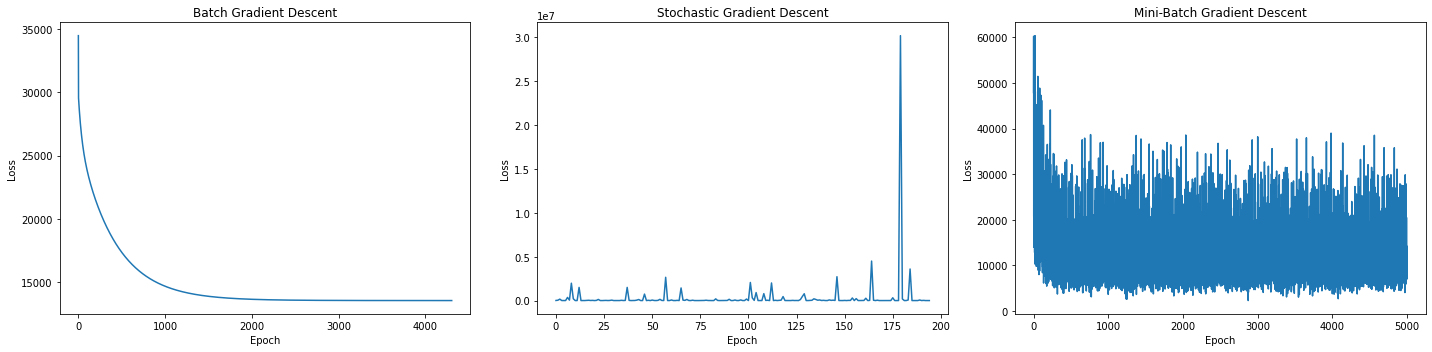

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
model4.history(ax[0])
ax[0].set_title('Batch Gradient Descent')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
model5.history(ax[1])
ax[1].set_title('Stochastic Gradient Descent')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
model6.history(ax[2])
ax[2].set_title('Mini-Batch Gradient Descent')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss')
plt.tight_layout()
plt.show()

# **Bài 3**

In [ ]:
# optimal weights
print(f"Model1's loss: {model1.best_weights()[0]}, best weight: {model1.best_weights()[1]}")
print(f"Model2's loss: {model2.best_weights()[0]}, best weight: {model2.best_weights()[1]}")
print(f"Model3's loss: {model3.best_weights()[0]}, best weight: {model3.best_weights()[1]}")
print(f"Model4's loss: {model4.best_weights()[0]}, best weight: {model4.best_weights()[1]}")
print(f"Model5's loss: {model5.best_weights()[0]}, best weight: {model5.best_weights()[1]}")
print(f"Model6's loss: {model6.best_weights()[0]}, best weight: {model6.best_weights()[1]}")

Model1's loss: 30264.574471897024, best weight: [[-143.30105058]
 [  60.39759241]]
Model2's loss: 0.010664057459638035, best weight: [[-134.29526512]
 [  64.62105919]]
Model3's loss: 3768.2152473868737, best weight: [[-144.18978526]
 [  56.25905429]]
Model4's loss: 13553.871967912493, best weight: [[-431.15885059]
 [   4.8405628 ]
 [ 178.00940473]]
Model5's loss: 0.024037304192684163, best weight: [[-410.14313803]
 [ -13.11677522]
 [ 199.93018817]]
Model6's loss: 2263.903494470197, best weight: [[-433.95170196]
 [   1.1744232 ]
 [ 178.01047327]]
